In [15]:
# dependecies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# for all my plots
palette = ['#E0B8AC', '#855648', '#6D312A', '#D0BEAA', '#CDA195', '#A49382', '#C7B7AB']
customCmap = ListedColormap(palette)

In [17]:
data = pd.read_csv('personalFinanceDataset.csv')
data.head()

age  gender           raceEthnicity                 education   region  \
0   35  Female                   White               High School    South   
1   65  Female  Black/African American               High School    South   
2   50    Male       Other/Multiracial                Bachelor's  Midwest   
3   40  Female                   White                Bachelor's     West   
4   30    Male  Black/African American  Some College/Associate's  Midwest   

  householdType  householdSize      career workArrangement  annualIncome  ...  \
0         DINKS              2      Retail          Office  30741.640000  ...   
1        Single              1     Retired         Retired  61059.581194  ...   
2  SingleParent              3  Healthcare          Office  57575.730000  ...   
3        Single              1       Sales          Office  96389.510000  ...   
4   SmallFamily              4     Service          Office  30245.270000  ...   

   contributions529  totalExpenses totalSavingsInvestments  monthlyCashFlow  \
0               0.0        5368.49                  143.09         -2949.78   
1               0.0        5258.28                    0.00          -169.98   
2               0.0        6578.61                    0.00         -1780.63   
3               0.0        7676.07                  954.95          -598.56   
4               0.0        7640.68                  254.91         -5375.15   

   housingRatio  debtToIncome  savingsInvestmentsRate  carPaymentRatio  \
0         66.32          1.33                    5.59             0.00   
1         25.51         25.51                    0.00            13.95   
2         37.63         11.88                    0.00             8.04   
3         28.46         14.87                   11.89            11.36   
4         57.12         27.03                   10.11            15.16   

   monthsSaved        financialHealth  
0         1.17  FinanciallyDistressed  
1         0.07  FinanciallyDistressed  
2         0.93  FinanciallyDistressed  
3         1.17      FinanciallyStable  
4         1.37  FinanciallyDistressed  

[5 rows x 68 columns]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         3500 non-null   int64  
 1   gender                      3500 non-null   object 
 2   raceEthnicity               3500 non-null   object 
 3   education                   3500 non-null   object 
 4   region                      3500 non-null   object 
 5   householdType               3500 non-null   object 
 6   householdSize               3500 non-null   int64  
 7   career                      3500 non-null   object 
 8   workArrangement             3500 non-null   object 
 9   annualIncome                3500 non-null   float64
 10  sideHustleIncome            3500 non-null   float64
 11  monthlyIncome               3500 non-null   float64
 12  housingStatus               3500 non-null   object 
 13  housingCost                 3500 

In [19]:
data.isnull().sum()

age                       0
gender                    0
raceEthnicity             0
education                 0
region                    0
                         ..
debtToIncome              0
savingsInvestmentsRate    0
carPaymentRatio           0
monthsSaved               0
financialHealth           0
Length: 68, dtype: int64

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
# test; i just wanted to see what would happen
duplicatedRows = data[data.duplicated()]
duplicatedRows.head()

Empty DataFrame
Columns: [age, gender, raceEthnicity, education, region, householdType, householdSize, career, workArrangement, annualIncome, sideHustleIncome, monthlyIncome, housingStatus, housingCost, propertyTax, hoaFees, homeInsurance, utilities, internet, phone, ownsCar, carPayment, carInsurance, gas, publicTransit, carMaintenance, healthInsurance, oopMedical, dentalVision, lifeInsurance, studentLoans, ccPayment, personalLoans, medicalDebt, groceries, diningOut, coffee, alcohol, streaming, musicStreaming, gaming, gym, otherSubscriptions, clothing, personalCare, householdSupplies, childcare, petExpenses, entertainment, hobbies, travel, gifts, donations, retirement401k, iraContribution, emergencyFundContributions, generalSavings, investmentContributions, contributions529, totalExpenses, totalSavingsInvestments, monthlyCashFlow, housingRatio, debtToIncome, savingsInvestmentsRate, carPaymentRatio, monthsSaved, financialHealth]
Index: []

[0 rows x 68 columns]

In [22]:
data.shape

(3500, 68)

In [23]:
# starting one hot encoding
data.head()

age  gender           raceEthnicity                 education   region  \
0   35  Female                   White               High School    South   
1   65  Female  Black/African American               High School    South   
2   50    Male       Other/Multiracial                Bachelor's  Midwest   
3   40  Female                   White                Bachelor's     West   
4   30    Male  Black/African American  Some College/Associate's  Midwest   

  householdType  householdSize      career workArrangement  annualIncome  ...  \
0         DINKS              2      Retail          Office  30741.640000  ...   
1        Single              1     Retired         Retired  61059.581194  ...   
2  SingleParent              3  Healthcare          Office  57575.730000  ...   
3        Single              1       Sales          Office  96389.510000  ...   
4   SmallFamily              4     Service          Office  30245.270000  ...   

   contributions529  totalExpenses totalSavingsInvestments  monthlyCashFlow  \
0               0.0        5368.49                  143.09         -2949.78   
1               0.0        5258.28                    0.00          -169.98   
2               0.0        6578.61                    0.00         -1780.63   
3               0.0        7676.07                  954.95          -598.56   
4               0.0        7640.68                  254.91         -5375.15   

   housingRatio  debtToIncome  savingsInvestmentsRate  carPaymentRatio  \
0         66.32          1.33                    5.59             0.00   
1         25.51         25.51                    0.00            13.95   
2         37.63         11.88                    0.00             8.04   
3         28.46         14.87                   11.89            11.36   
4         57.12         27.03                   10.11            15.16   

   monthsSaved        financialHealth  
0         1.17  FinanciallyDistressed  
1         0.07  FinanciallyDistressed  
2         0.93  FinanciallyDistressed  
3         1.17      FinanciallyStable  
4         1.37  FinanciallyDistressed  

[5 rows x 68 columns]

In [24]:
# making all categorical values numerical => correlation table
ohe_gender = pd.get_dummies(data.gender)
ohe_raceEthnicity = pd.get_dummies(data.raceEthnicity)
ohe_education = pd.get_dummies(data.education)
ohe_region = pd.get_dummies(data.region)
ohe_householdType = pd.get_dummies(data.householdType)
ohe_career = pd.get_dummies(data.career)
ohe_workArrangement = pd.get_dummies(data.workArrangement)
ohe_housingStatus = pd.get_dummies(data.housingStatus)

In [25]:
data = pd.concat([data, ohe_gender, ohe_career, ohe_education, ohe_householdType, ohe_housingStatus, ohe_raceEthnicity, ohe_region, ohe_workArrangement], axis='columns')
data.head()

age  gender           raceEthnicity                 education   region  \
0   35  Female                   White               High School    South   
1   65  Female  Black/African American               High School    South   
2   50    Male       Other/Multiracial                Bachelor's  Midwest   
3   40  Female                   White                Bachelor's     West   
4   30    Male  Black/African American  Some College/Associate's  Midwest   

  householdType  householdSize      career workArrangement  annualIncome  ...  \
0         DINKS              2      Retail          Office  30741.640000  ...   
1        Single              1     Retired         Retired  61059.581194  ...   
2  SingleParent              3  Healthcare          Office  57575.730000  ...   
3        Single              1       Sales          Office  96389.510000  ...   
4   SmallFamily              4     Service          Office  30245.270000  ...   

   White  Midwest Northeast  South   West  Hybrid  Office  PartTime  Remote  \
0   True    False     False   True  False   False    True     False   False   
1  False    False     False   True  False   False   False     False   False   
2  False     True     False  False  False   False    True     False   False   
3   True    False     False  False   True   False    True     False   False   
4  False     True     False  False  False   False    True     False   False   

   Retired  
0    False  
1     True  
2    False  
3    False  
4    False  

[5 rows x 115 columns]

In [28]:
numeric = data.select_dtypes(include=['number', 'bool'])
numeric.head()

age  householdSize  annualIncome  sideHustleIncome  monthlyIncome  \
0   35              2  30741.640000               0.0    2561.803333   
1   65              1  61059.581194               0.0    5088.298433   
2   50              3  57575.730000               0.0    4797.977500   
3   40              1  96389.510000               0.0    8032.459167   
4   30              4  30245.270000               0.0    2520.439167   

   housingCost  propertyTax  hoaFees  homeInsurance  utilities  ...  White  \
0      1699.04       141.59      0.0         161.80     203.10  ...   True   
1      1298.08       108.17      0.0          81.41     150.91  ...  False   
2      1805.32       150.44      0.0         183.81     232.31  ...  False   
3      2286.14       190.51      0.0         175.20     128.24  ...   True   
4      1439.74       119.98      0.0         115.87     239.45  ...  False   

   Midwest  Northeast  South   West  Hybrid  Office  PartTime  Remote  Retired  
0    False      False   True  False   False    True     False   False    False  
1    False      False   True  False   False   False     False   False     True  
2     True      False  False  False   False    True     False   False    False  
3    False      False  False   True   False    True     False   False    False  
4     True      False  False  False   False    True     False   False    False  

[5 rows x 106 columns]

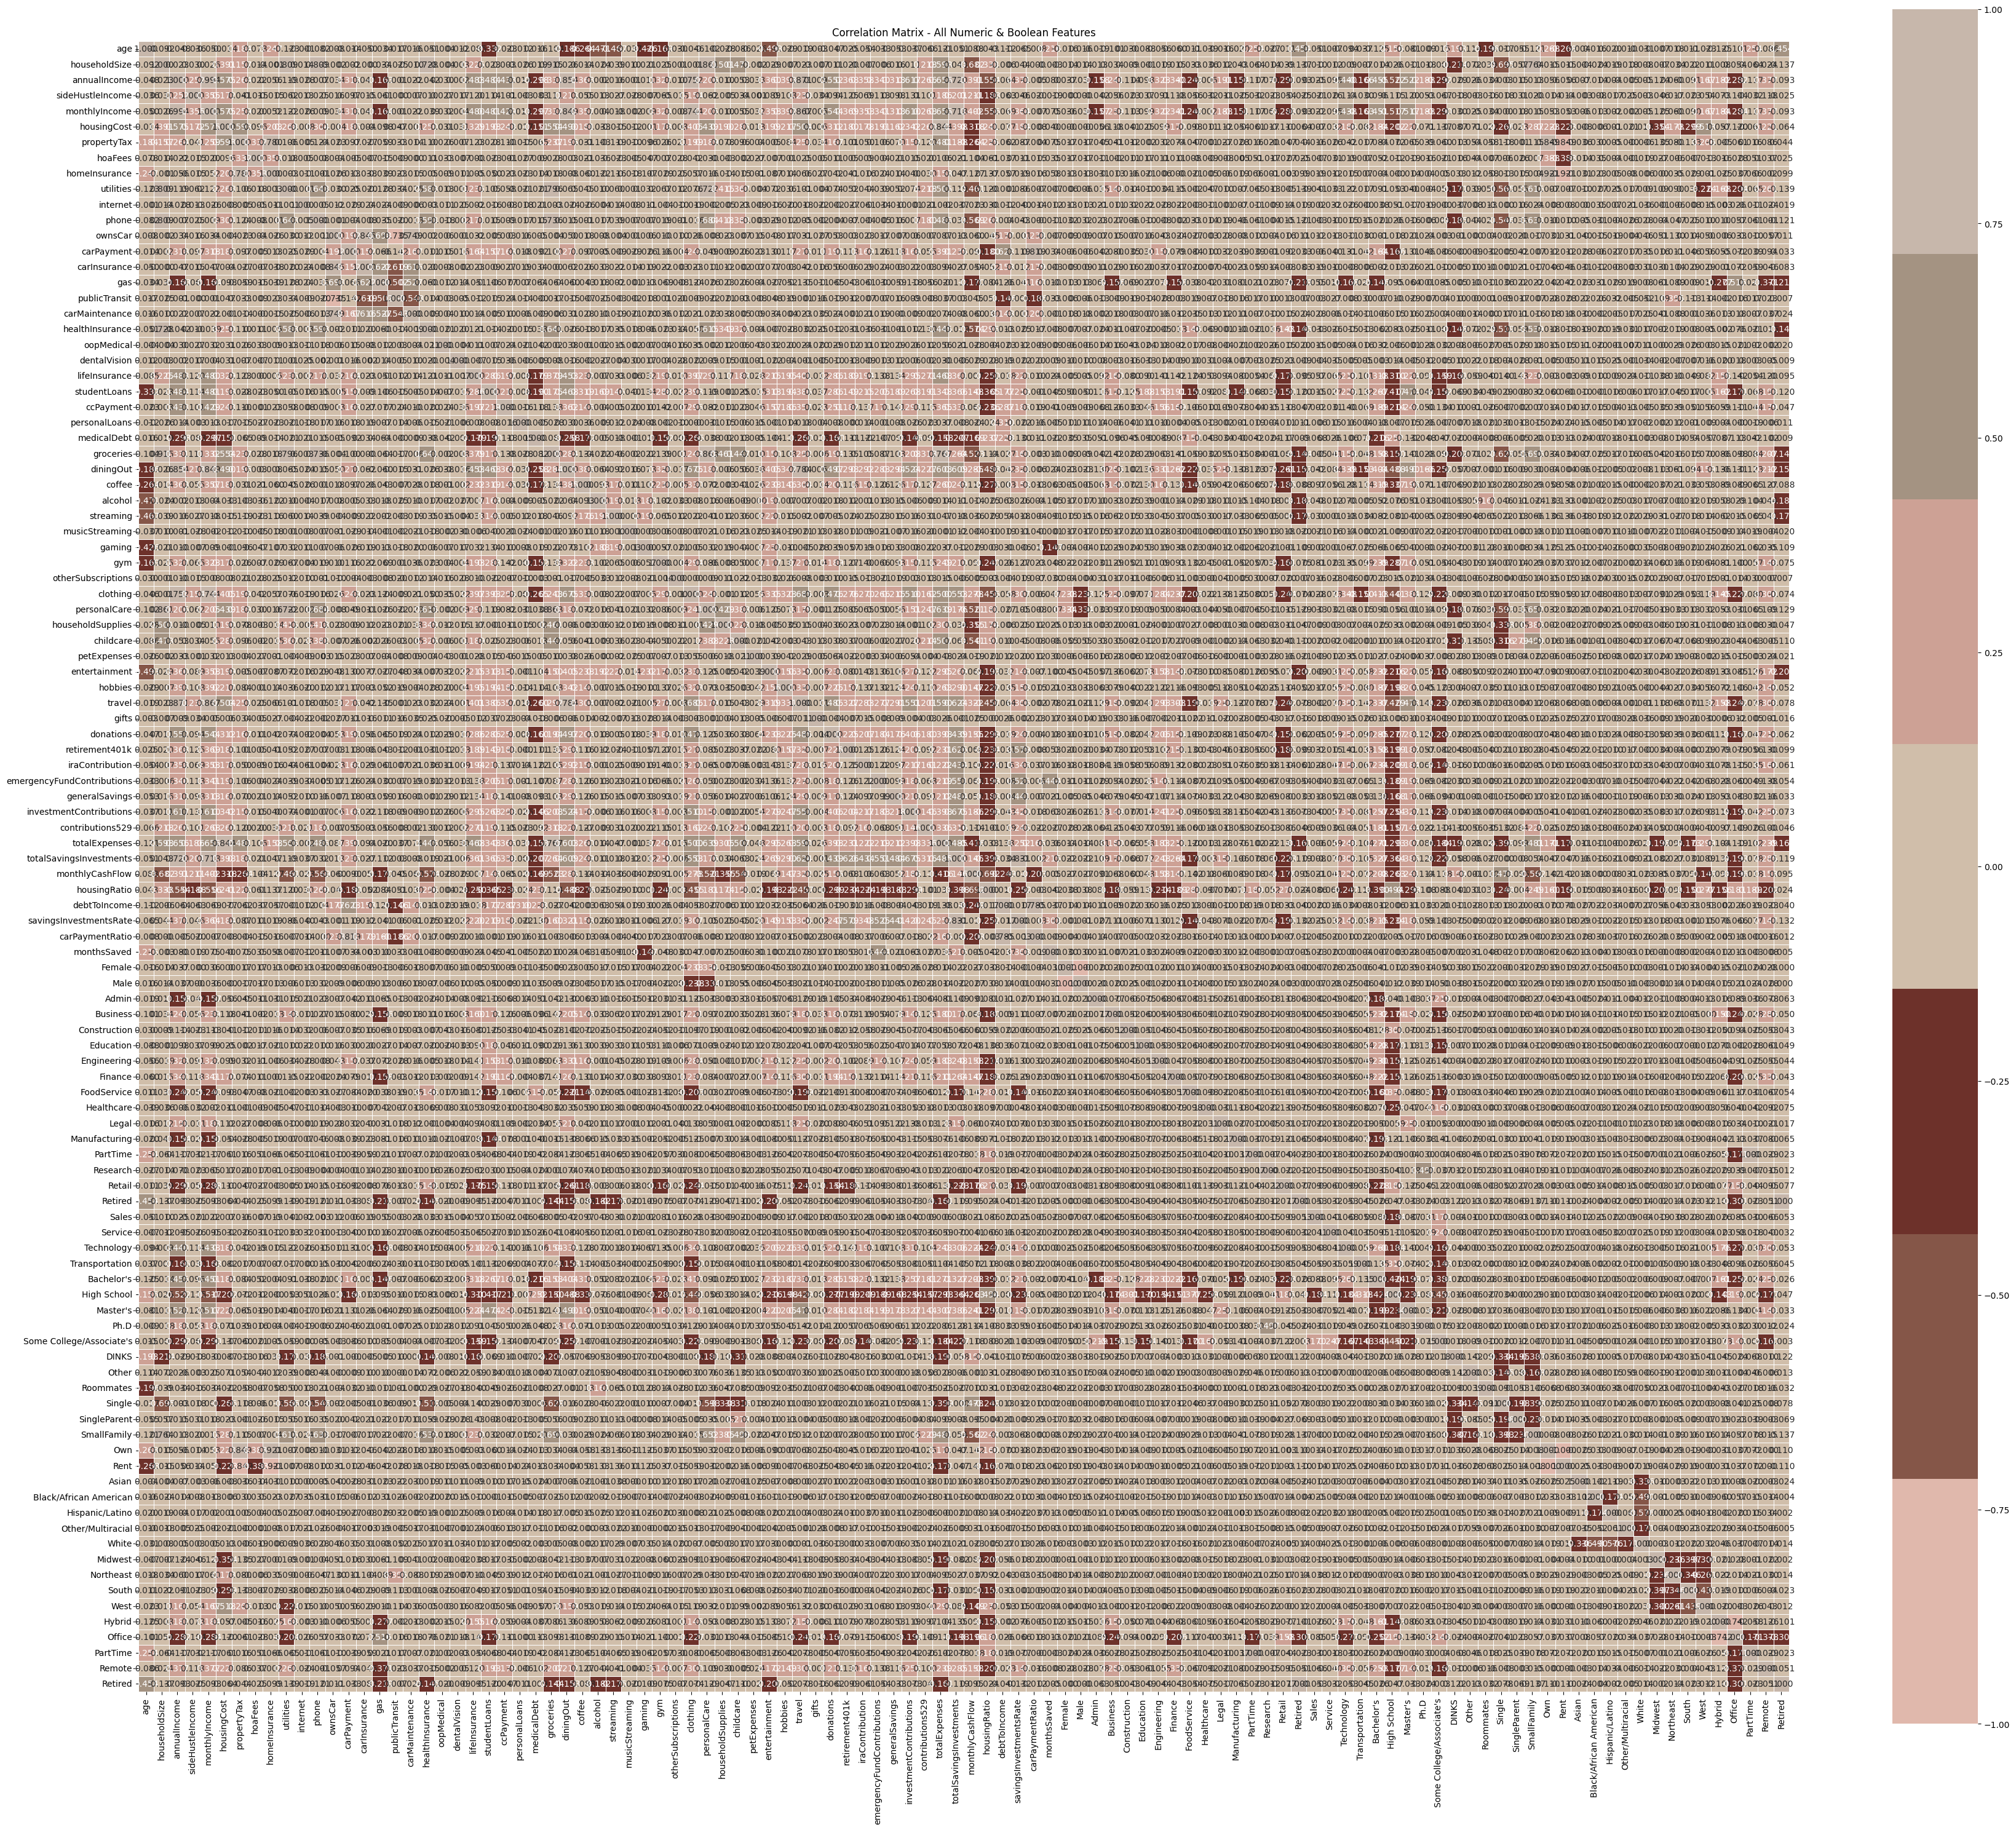

In [ ]:
correlationMatrix = numeric.corr()

plt.figure(figsize=(36, 30))
sns.heatmap(correlationMatrix, annot=True, cmap=customCmap, 
            fmt='.3f', square=True, linewidths=0.5)
plt.title('Correlation Matrix - All Numeric & Boolean Features',)
plt.tight_layout()
plt.show()